In [25]:
# Importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

In [26]:
df = pd.read_csv('all_month.csv', #opening the file
                 delimiter = ',') #using the delimiter
df.head() #Checking the head only

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-05-07T14:45:02.290Z,32.899167,-116.212167,9.92,1.11,ml,22.0,85.0,0.09456,0.18,...,2020-05-07T14:48:29.710Z,"27km NW of Ocotillo, CA",earthquake,0.33,0.84,0.154,14.0,automatic,ci,ci
1,2020-05-07T14:43:18.520Z,33.501667,-116.507667,9.23,1.38,ml,52.0,57.0,0.05900,0.18,...,2020-05-07T14:58:36.453Z,"16km ESE of Anza, CA",earthquake,0.18,0.41,0.180,26.0,automatic,ci,ci
2,2020-05-07T14:09:28.880Z,19.222500,-155.382004,31.17,1.90,md,46.0,154.0,0.02091,0.16,...,2020-05-07T14:12:40.700Z,"10km E of Pahala, Hawaii",earthquake,0.57,0.86,0.100,6.0,automatic,hv,hv
3,2020-05-07T13:58:35.160Z,40.510833,-112.165000,-0.41,1.53,md,12.0,95.0,0.06867,0.20,...,2020-05-07T14:50:10.450Z,"11km E of Tooele, Utah",earthquake,0.53,1.42,0.412,8.0,reviewed,uu,uu
4,2020-05-07T13:54:00.200Z,33.342000,-115.799833,1.06,1.34,ml,8.0,181.0,0.21720,0.18,...,2020-05-07T13:57:58.419Z,"6km W of Bombay Beach, CA",earthquake,1.76,31.61,0.216,30.0,automatic,ci,ci


In [27]:
#Trying to plot without modifying the NaN
''' 
plt.hist(df['mag'], bins=10, range=(0,10))
plt.xlabel('Magnitude', size=10)
plt.ylabel('Frequency', size=10)

'''
#making a graph without dropping NaN (Not available Number) will cause trouble like this

" \nplt.hist(df['mag'], bins=10, range=(0,10))\nplt.xlabel('Magnitude', size=10)\nplt.ylabel('Frequency', size=10)\n\n"

In [28]:
# Removing NaN data, since it will trouble the plot process
#md_df is modified dataframe
mod_df = df.dropna(axis = 0, subset = ['mag'])
#print(df)
#print(mod_df)

Text(0.5, 1.0, 'Earthquake Magnitudes and its Frequency')

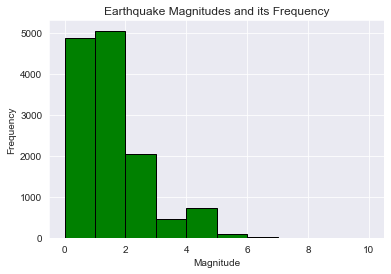

In [78]:
# Histogram / Bar Plot

plt.hist(mod_df['mag'], bins=10, range=(0,10), color='g', edgecolor='k')
plt.xlabel('Magnitude', size=10)
plt.ylabel('Frequency', size=10)
plt.title('Earthquake Magnitudes and its Frequency')

Text(0.5, 1.0, 'KDE Plot of Earthquake Magnitude')

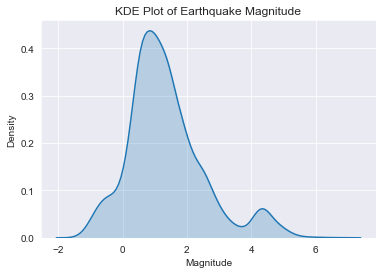

In [42]:
# KDE plot, with Gaussian kernel, width 0.2
sns.set_style('darkgrid')
sns.kdeplot(np.array(mod_df['mag']), #input is in array
            kernel='gau', #using Gaussian Kernel
            bw=0.2, #width
            shade= True) 
plt.xlabel('Magnitude', size=10)
plt.ylabel('Density', size=10)
plt.title('KDE Plot of Earthquake Magnitude', size=12)

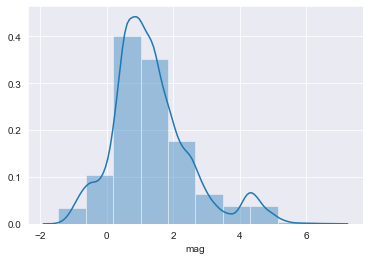

In [87]:
sns.distplot(mod_df['mag'], bins=10, kde=True)

# 2.4. Plot latitude versus longitude for all earthquakes 

Text(0.5, 1.0, 'Latitude vs Longitude of All Earthquakes')

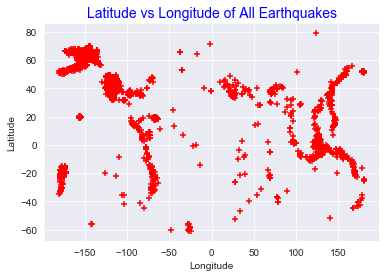

In [51]:
plt.scatter(mod_df['longitude'], 
            mod_df['latitude'], 
            c='r', marker='+')
plt.xlabel('Longitude', size=10)
plt.ylabel('Latitude', size=10)
plt.title('Latitude vs Longitude of All Earthquakes', size=14, c='b')


Text(0.5, 1.0, 'CFD of Earthquake Depth')

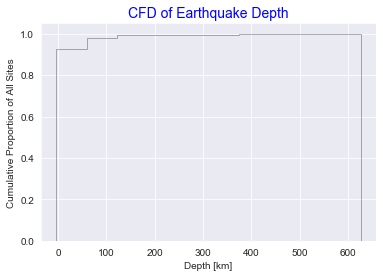

In [91]:
plt.hist(mod_df['depth'], cumulative=True, density=50,color='g', alpha=0.3, edgecolor='k', histtype='step')
plt.xlabel('Depth [km]', size=10)
plt.ylabel('Cumulative Proportion of All Sites', size=10)
plt.title('CFD of Earthquake Depth', size='14', c='b')

/Users/cakherman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'CFD of Earthquake Depth')

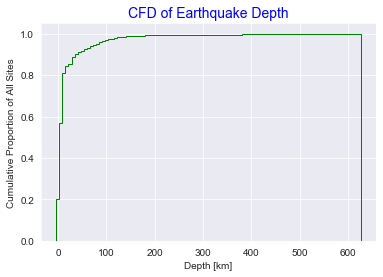

In [86]:
#normalized cumulative
plt.hist(mod_df['depth'], 
         bins=100,
         cumulative=True,#cumulative
         normed=True, #normalized
         color='g', #line color is green
         histtype='step') #type of histogram used
plt.xlabel('Depth [km]', size=10)
plt.ylabel('Cumulative Proportion of All Sites', size=10)
plt.title('CFD of Earthquake Depth', size='14', c='b')

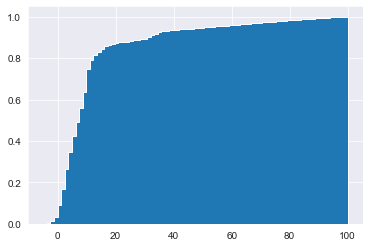

In [84]:
n, bins, patches = plt.hist(mod_df['depth'], density= True, cumulative=True,bins=85, range=(-5,100), histtype='stepfilled')

Text(0.5, 1.0, 'Earthquake Magnitude and Depth')

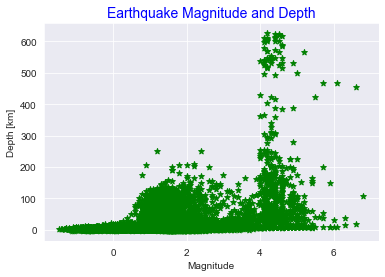

In [69]:
plt.scatter(mod_df['mag'], 
            mod_df['depth'], 
            c='g', 
            marker='*')
plt.xlabel('Magnitude', size=10)
plt.ylabel('Depth [km]', size=10)
plt.title('Earthquake Magnitude and Depth', size='14', c='b')

# Q-Q plot using scipy.stats.probplot

((array([-3.90166894, -3.68147645, -3.56081165, ...,  3.56081165,
          3.68147645,  3.90166894]),
  array([-1.46, -1.42, -1.38, ...,  6.6 ,  6.6 ,  6.8 ])),
 (1.1661039603533043, 1.35303080421749, 0.9715668092576317))

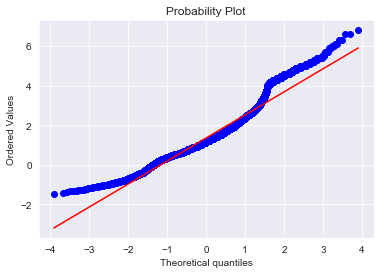

In [75]:
stats.probplot(mod_df['mag'], #the data to be called
               dist='norm', #using normal distribution
               plot=pylab) #plot using pylab